In [1]:
#! pip install multiprocess --user

In [2]:
import numpy as np

from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
import sklearn.metrics as sm
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import Imputer
from sklearn import metrics
from sklearn.decomposition import PCA

import pandas as pd

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.patches as mpatches
from matplotlib import figure
from matplotlib.ticker import MaxNLocator
from collections import namedtuple
matplotlib.rcParams.update({'font.size': 22})
import seaborn as sns

print(__doc__)

from time import time

from multiprocess import Pool
import pdb
import pickle

Automatically created module for IPython interactive environment


## Read in data as csv 

In [3]:
data=pd.read_table('/Users/gracer/Google Drive/ABCD/important_txt/4Kmeans.csv', sep=',')

## Seperate by sex

In [4]:
dudes = data[data['sex'] == 0]
lady_dudes = data[data['sex'] == 1]

## Get a List of variable names

In [5]:
var_names=list(lady_dudes.columns.values)
cols = lady_dudes.columns
lady_dudes.columns = ['sub','pds_ht2_y',  'pds_skin2_y',  'pds_bdyhair_y','labels_true',
            'pds_f4_2_y',  'pds_f5_y',  'pds_m4_y', 'pds_m5_y', 'interview_age', 'gender',
             'anthroheightcalc',  'anthroweightcalc',  'anthro_waist_cm',
             'hormone_scr_dhea_mean',  'hormone_scr_hse_mean',  'hormone_scr_ert_mean',  'sex']
# print(dudes)
# cols[1]

## Combine variables of interest into a single matrix

In [6]:
labels_true=lady_dudes['labels_true'].values
subs=lady_dudes['sub'].values
f2=lady_dudes['pds_ht2_y'].values
f3=lady_dudes['pds_skin2_y'].values
f4=lady_dudes['pds_bdyhair_y'].values
f5=lady_dudes['pds_f4_2_y'].values
f6=lady_dudes['pds_f5_y'].values
f7=lady_dudes['interview_age'].values
f8=lady_dudes['anthroheightcalc'].values 
f9=lady_dudes['anthroweightcalc'].values
f10=lady_dudes['anthro_waist_cm'].values
f11=lady_dudes['hormone_scr_dhea_mean'].values
f12=lady_dudes['hormone_scr_hse_mean'].values
f13=lady_dudes['hormone_scr_ert_mean'].values
X=np.matrix(zip(f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13))

## Create a list of the variable names included in this analyses

In [7]:
names=['pds_ht2_y',
'pds_skin2_y',
'pds_bdyhair_y',
'pds_m4_y',
'pds_m5_y',
'interview_age',
'anthroheightcalc', 
'anthroweightcalc',
'anthro_waist_cm',
'hormone_scr_dhea_mean',
'hormone_scr_hse_mean',
'hormone_scr_ert_mean']

## Check the data 

[(1, 610), (2, 271), (3, 20), (4, 2)]

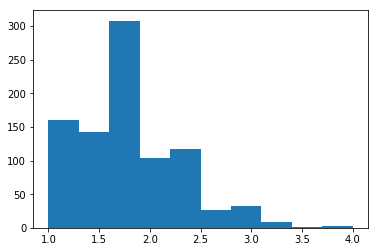

In [8]:
%matplotlib inline
plt.hist(labels_true)
y = np.bincount(labels_true.astype(int))
ii = np.nonzero(y)[0]
zip(ii,y[ii])

An issue is a low number of people in groups 3 and 4

## Possible solution, randomly sample equal numbers
Using the rule of thumb 2^m I need 8 people per cluster 
Possible combinations below

In [9]:
import math
x=math.factorial(70)
y=math.factorial(70-20)
fact=x/y
print(fact)

393849377343759797528386895216640000


## Create target variable (or the one you are comparing)

In [10]:
target_var=pd.DataFrame(lady_dudes['labels_true'].values)
subs_var=pd.DataFrame(subs)
target_var.shape

(903, 1)

## Impute missing values
This will not allow missing data, so have to impute nans

In [11]:
imputer = Imputer()
transformed_values = imputer.fit_transform(X)
# count the number of NaN values in each column
print(np.isnan(transformed_values).sum()) 
transformed_values_scale = scale(transformed_values)
transformed_values_scale.shape
#the target variable is the last variable
trans = np.column_stack((transformed_values_scale,subs,target_var.round(decimals=0)))

0


In [12]:
print(trans.shape)
trans[10,:]

(903, 14)


array([1.794456303524673, -0.9160012976566702, -0.8450545827601281,
       0.24962498873615438, -0.19189160229840163, 0.6021071251259197,
       1.9996576547510394, 4.417977219002053, 3.245935807081636,
       -0.8820291919726035, 1.8356440165628365e-15, -9.680805970204422e-15,
       'NDAR_INV0C1ED337', 2.0], dtype=object)

## Function to randomly sample the data and perform the kmeans

In [13]:
def bench_k_means(estimator, name, data):
        t0 = time() #time
        estimator.fit(data) #estimating the fit 
        print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
              % (name, (time() - t0), estimator.inertia_,
                 metrics.homogeneity_score(labels, estimator.labels_),
                 metrics.completeness_score(labels, estimator.labels_),
                 metrics.v_measure_score(labels, estimator.labels_),
                 metrics.adjusted_rand_score(labels, estimator.labels_),
                 metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
                 metrics.silhouette_score(data, estimator.labels_,
                                          metric='euclidean',
                                          sample_size=sample_size)))


In [14]:
def meaner(**kwargs):
    for x in kwargs.items():
        print(x)
#     z=sum(*arg)/len(*arg)
#     return z

In [15]:
def PCA_reducer(DATA):
    n_samples, n_features = DATA.shape
    labels = np.round(targets)
    n_digits = len(np.unique(targets))
    sample_size=n_samples
    
    PCA_results = PCA(n_components=2)
    reduced_data = PCA_results.fit_transform(DATA)
    
    # Dump components relations with features:
    print pd.DataFrame(PCA_results.components_,index = ['PC-1','PC-2'])
    plt.semilogy(PCA_results.explained_variance_ratio_, '--o')
    return (PCA_results.components_, PCA_results.explained_variance_ratio_, 
            PCA_results.explained_variance_, PCA_results.mean_) 
    


In [16]:
def split_list(a_list):
        half = len(a_list)/2
        return a_list[:half], a_list[half:]

In [17]:
def random_selct(DATA):
    dictr = {}
    #defining the levels, based on the final column add the values to the dictionary
    levels = ['lev1','lev2','lev3']
    i=1
    for lev in levels:
        if i < len(levels)+1:
            dictr[lev] = DATA[np.where(DATA[:,-1] == i)]
            i=i+1
    '''
    make dictionaries to populate each run per parallel run
    '''
    rand_dict={}
    target_dict={}
    ind_dict={}
    sub_dict = {}
    '''
    subsetting the data and putting it into a dictionary
    '''
    for key, value in dictr.iteritems():
        #shuffle the data's index
        ind = np.random.permutation(value.shape[0])#random index
        #get the first 20 subjects indexes
        training_idx = ind[:50]#get 20 subjects indexes
        #get the first 20 subjects
        '''
        this needs to be the number of variables/factors you are expecting
        for females this is 12!!!!
        '''
        value_data = value[:,0:12]
#         print(value_data.shape)
        '''
        for females this is 13!!!!
        '''
        sub_data = value[:,12]
#         print(sub_data)
        label_data = value[:,-1]
        training = value_data[training_idx,:]#select 20 subjects from the value in the dictionary
        subs = sub_data[training_idx]
        labels_true = label_data[training_idx]
        #saving the true labels
        target_dict[key] = labels_true #add targets to dictionary
        rand_dict[key] = training #match the randomized data to the ind_dict by key 
        ind_dict[key] = training_idx #add the indexes to the dictionary
        sub_dict[key] = subs
    '''
    combine all the dictionaries we have created thus far. 
    data, index, and targets
    '''    
    list_dicts = [rand_dict, target_dict, ind_dict, sub_dict]
    list_names  = ['rand_dict', 'target_dict', 'ind_dict', 'sub_dict']
    all_dicts = {}
    i = 0
    for d in list_dicts:
        all_dicts[list_names[i]] = list_dicts[i]
        i = i +1
#         print(all_dicts['rand_dict'])
   
    '''
    combine the randomized data by the actual level
    '''
    data=np.vstack((rand_dict['lev1'],rand_dict['lev2'],rand_dict['lev3']))
    print(data.shape)
    '''
    defining the parameters for the k means and the PCA
    '''
    targets=np.hstack((target_dict['lev1'],target_dict['lev2'],target_dict['lev3']))
    targets = targets.astype('int')
    n_samples, n_features = data.shape
    n_digits = len(np.unique(targets))
    sample_size=n_samples
    '''
    defining the parameters for the k means
    '''    
    kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=300)
    ks=kmeans.fit_predict(data)
    indexes=np.hstack((ind_dict['lev1'],ind_dict['lev2'],ind_dict['lev3']))
    subses=np.hstack((sub_dict['lev1'],sub_dict['lev2'],sub_dict['lev3']))
    list_together = [indexes, subses, ks, targets,data]
    '''
    IMPORTANT ALL THE DATA INDEXED WITH SUBJECTS
    '''
    all_together = np.column_stack(list_together)
#     print(all_together.shape)
    ###################################################
    
    
    ###########################################
    #            rebuild to combine data      #
    ###########################################
    comb_data = np.column_stack((data, kmeans.fit_predict(data)))
#     print(comb_data.shape)
    comb_dictr = {}
    '''
    seperating the data based on the fit predict value (found right above)
    '''
    i=0
    for lev in levels:
        if i < len(levels)+1:
            comb_dictr[lev] = comb_data[np.where(comb_data[:,-1] == i)]
            i=i+1
    '''
    defining the parameters for the PCA and running the PCA 
    '''
    ###########################################
    #            PCA                          #
    ###########################################
    PCA_dict={}
    PCA_data={}
    PCA_final = {}

    for key, value in comb_dictr.iteritems():
        PCA_dict[key] = PCA(n_components=2)
        #make sure the last column which is the predicted label isn't included
        PCA_data[key] = PCA_dict[key].fit_transform(value[:,0:12])
        #make sure the last column which is the predicted label isn't included
        ID = np.identity(value[:,0:12].shape[1])  # identity matrix
        coef = PCA_dict[key].transform(ID)
        PCA_final[key] = coef
        
        
        plt.semilogy(PCA_dict[key].explained_variance_ratio_, '--o', label = '%s'%key)
        plt.legend()
        plt.subplot(1, 2, 2)

    reduced_data = PCA(n_components=2).fit_transform(data)
    kmeans.fit(reduced_data)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh. Use last trained model.
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
    plt.subplot(1, 2, 1)
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1)
    plt.clf()
    plt.imshow(Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired,
               aspect='auto', origin='lower')

    plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
    # Plot the centroids as a white X
    centroids = kmeans.cluster_centers_
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=169, linewidths=3,
                color='w', zorder=10)
    plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
              'Centroids are marked with white cross')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
#     plt.show()
    
    ####THINGS TO SAVE#############################################################################        
    kmeans.fit(data)
    y_kmeans = kmeans.predict(data)
    clusters = kmeans.fit_predict(data)
    cluster_space = kmeans.fit_transform(data)
    
    
    
    centroids = kmeans.cluster_centers_   
    
    Components = np.vstack((PCA_dict['lev1'].components_,
                            PCA_dict['lev2'].components_,PCA_dict['lev3'].components_))
    
    Var_ratio = PCA_final
    
    lev1_VarRatio = np.vstack((PCA_final['lev1']))
    print(lev1_VarRatio.shape)
    lev2_VarRatio = np.vstack((PCA_final['lev2']))
    lev3_VarRatio = np.vstack((PCA_final['lev3']))
    
    ind_dict = np.hstack((ind_dict['lev1'],
                            ind_dict['lev2'],ind_dict['lev3']))
    
    ########################################################################################################
    return (clusters, cluster_space,
            centroids,targets,
            all_together ,Components,
            Var_ratio, comb_data,
            lev1_VarRatio,lev2_VarRatio,lev3_VarRatio,
            kmeans,DATA)

# 0clusters
# 1cluster_space, 
# 2centroids, 
# 3targets, 
# 4all_dict,
# 5Components,
# 6Var_ratio, 
# 7full_data,
# 8lev1_VarRatio,
# 9lev2_VarRatio,
# 10lev3_VarRatio
# 11kmeans
# 12DATA

In [18]:
def main(i):
    names = ['pds_ht2_y',
'pds_skin2_y',
'pds_bdyhair_y',
'pds_f4_2_y',
'pds_f5_y',
'interview_age',
'anthroheightcalc', 
'anthroweightcalc',
'anthro_waist_cm',
'hormone_scr_dhea_mean',
'hormone_scr_hse_mean',
'hormone_scr_ert_mean',
'labels_pred',
'labels_true']
    
    Clusters = []
    Cluster_space = []
    Centroids = []
    
    Comp = []
    Var_ratio = []
    
    Targets = []
    all_dicts = []
    
    Comb_data = []
    
    Lev1_VarRatio = []
    Lev2_VarRatio = []
    Lev3_VarRatio = []
    
    kmeans = []
    filename = '/Users/gracer/Google Drive/ABCD/important_txt/female_data.pickle'
    handle = open(filename, 'wb')
    for x in range(0,i):
        print(x)
        Q = random_selct(trans)
        Clusters.append(Q[0])
        Cluster_space.append(Q[1])
        Centroids.append(Q[2])
        
        Targets.append(Q[3])
        all_dicts.append(Q[4])
        
        Comp.append(Q[5])
        Var_ratio.append(Q[6])
        
        Comb_data.append(Q[7])
        
        Lev1_VarRatio.append(Q[8].transpose())
        Lev2_VarRatio.append(Q[9].transpose())
        Lev3_VarRatio.append(Q[10].transpose())
        
        kmeans.append(Q[11])
        '''
        pickling after each run
        '''
        varsy = [Clusters ,Cluster_space,
                Centroids , Targets,
                all_dicts, Comp,
                Var_ratio, Comb_data,
                Lev1_VarRatio, Lev2_VarRatio, Lev3_VarRatio,
                kmeans, trans]
        keys=['Clusters' ,'Cluster_space',
                'Centroids' , 'Targets',
                'all_dicts', 'comp',
                'Var_ratio', 'Comb_data',
                'Lev1_VarRatio', 'Lev2_VarRatio', 'Lev3_VarRatio',
                'kmeans', 'trans']
        all_vars={}
        j=0
        for j in range(len(keys)):
            j=int(j)
            print('this is the counter %i'%j)
            all_vars[keys[j]] = varsy[j]
            j=j+1
        print('hi')
        pickle.dump(all_vars, handle, protocol=pickle.HIGHEST_PROTOCOL)
        print('bey')
        
    All_lev1Ratio = np.vstack(Lev1_VarRatio)
    All_lev2Ratio = np.vstack(Lev2_VarRatio)
    All_lev3Ratio = np.vstack(Lev3_VarRatio)
    
    All_clust = np.hstack(Clusters)
    All_clust_space = np.vstack(Cluster_space)
    
    All_labels = np.hstack(Targets)
    All_dicts = np.vstack(all_dicts)
    All_comp = np.vstack(Comp)
    All_var_ratio = Var_ratio
    All_data = np.vstack(Comb_data)
    All_data=pd.DataFrame(data=All_data[1:,1:],index=All_data[1:,0])
    
    
    return (All_clust ,All_clust_space,
            All_labels , All_dicts,
            All_comp, All_var_ratio,
            All_data, names,
            All_lev1Ratio, All_lev2Ratio, All_lev3Ratio,
            kmeans, trans, All_dicts)
i = 5000
FINAL = []


# FINAL = main(i)
if __name__ == "__main__": 
    pool = Pool(processes=2)
    FINAL = pool.map(main, (i,i)) 

0
0
(150, 12)
(150, 12)


/anaconda2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/anaconda2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(12, 2)
this is the counter 0
(12, 2)
this is the counter 1
this is the counter 0
this is the counter 2
this is the counter 3
this is the counter 1
this is the counter 2
this is the counter 4
this is the counter 5
this is the counter 3
this is the counter 6
this is the counter 4
this is the counter 5
this is the counter 7
this is the counter 6
this is the counter 8
this is the counter 9
this is the counter 7
this is the counter 8
this is the counter 10
this is the counter 9
this is the counter 11
this is the counter 10
this is the counter 12
this is the counter 11
hi
this is the counter 12
hi
bey
1
bey
1
(150, 12)
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
(12, 2)
this is the counter 4
this is the counter 5
this is the counter 0
this is the counter 6
this is the counter 1
this is the counter 7
this is the counter 8
this is the counter 2
this is the counter 3
this is the counter 9
this is the counter 10
this is the counter 4

13
(150, 12)
bey
13
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
(12, 2)
this is the counter 2
this is the counter 0
this is the counter 3
this is the counter 1
this is the counter 4
this is the counter 5
this is the counter 2
this is the counter 6
this is the counter 3
this is the counter 7
this is the counter 4
this is the counter 8
this is the counter 5
this is the counter 9
this is the counter 6
this is the counter 10
this is the counter 7
this is the counter 11
this is the counter 8
this is the counter 12
this is the counter 9
this is the counter 10
hi
this is the counter 11
this is the counter 12
hi
bey
bey
14
14
(150, 12)
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this i

this is the counter 12
hi
bey
26
(150, 12)
bey
26
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
27
(150, 12)
bey
27
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2

this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
39
(150, 12)
bey
39
(150, 12)
(12, 2)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 0
this is the counter 4
this is the counter 1
this is the counter 5
this is the counter 2
this is the counter 6
this is the counter 3
this is the counter 7
this is the counter 4
this is the counter 8
this is the counter 5
this is the counter 6
this is the counter 9
this is the counter 10
this is the counter 7
this is the counter 11
this is the counter 8
this is the counter 12
this is the counter 9
hi
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
40
(150, 12)
bey
40
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
(12, 2)
this is the counter 6
this is the counter 7
this is the counter 0
this is the counter 8
this is the counter 1
th

this is the counter 10
this is the counter 11
this is the counter 11
this is the counter 12
this is the counter 12
hi
hi
bey
bey
52
52
(150, 12)
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
53
(150, 12)
bey
53
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this 

this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
65
(150, 12)
bey
65
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
(12, 2)
this is the counter 3
this is the counter 4
this is the counter 0
this is the counter 5
this is the counter 1
this is the counter 6
this is the counter 2
this is the counter 7
this is the counter 3
this is the counter 8
this is the counter 4
this is the counter 9
this is the counter 5
this is the counter 10
this is the counter 6
this is the counter 11
this is the counter 7
this is the counter 8
this is the counter 12
this is the counter 9
hi
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
66
bey
(150, 12)
66
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is th

this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
78
(150, 12)
bey
78
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
79
(150, 12)
bey
79
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is th

this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
91
(150, 12)
bey
91
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
92
(150, 12)
bey
92
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is th

hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
104
(150, 12)
bey
104
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
105
(150, 12)
bey
105
(150, 12)
(12, 2)
this is the count

this is the counter 1
this is the counter 9
this is the counter 2
this is the counter 10
this is the counter 3
this is the counter 11
this is the counter 4
this is the counter 12
hi
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
117
(150, 12)
bey
117
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi


this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
130
(150, 12)
bey
130
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 

this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
143
(150, 12)
bey
143
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
(12, 2)
hi
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 

this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
(12, 2)
this is the counter 5
this is the counter 0
this is the counter 6
this is the counter 1
this is the counter 7
this is the counter 2
this is the counter 8
this is the counter 3
this is the counter 9
this is the counter 10
this is the counter 4
this is the counter 11
this is the counter 5
this is the counter 12
this is the counter 6
this is the counter 7
hi
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
156
(150, 12)
bey
156
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 

hi
bey
168
(150, 12)
bey
168
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
(12, 2)
this is the counter 4
this is the counter 0
this is the counter 5
this is the counter 1
this is the counter 6
this is the counter 2
this is the counter 7
this is the counter 3
this is the counter 8
this is the counter 4
this is the counter 9
this is the counter 5
this is the counter 10
this is the counter 6
this is the counter 11
this is the counter 7
this is the counter 12
this is the counter 8
hi
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
bey
169
169
(150, 12)
(150, 12)
(12, 2)
(12, 2)
this is the counter 0
this is the counter 0
this is the counter 1
this is the counter 1
this is the counter 2
this is the counter 2
this is the counter 3
this is the counter 3
this is the counter 4
this is the counter 4
this is the counter 5
this is the counter 5
this is the counter 6
this is the counter 6
t

this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
181
(150, 12)
bey
181
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
(12, 2)
hi
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
182
(150, 12)
bey
182
(150, 12)
(12, 2)
(12, 2)
this is the counter 0
this is the counter 0
this is the counter 1
this is the counter 1
this is the counter 2
this is the counter 2
this is the counter 3
this is the counter 3
this is the counter 4
this is the counter 4
this is the counter 

this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
bey
194
194
(150, 12)
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
(12, 2)
hi
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
195
(150, 12)
bey
195
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this i

this is the counter 5
this is the counter 12
hi
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
207
(150, 12)
bey
207
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
208
bey
208
(150, 12)
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
(12, 2)
this is the counter 3
this is the coun

this is the counter 1
hi
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
bey
220
220
(150, 12)
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
(12, 2)
this is the counter 2
this is the counter 0
this is the counter 3
this is the counter 1
this is the counter 4
this is the counter 5
this is the counter 2
this is the counter 3
this is the counter 6
this is the counter 4
this is the counter 7
this is the counter 5
this is the counter 8
this is the counter 6
this is the counter 9
this is the counter 10
this is the counter 7
this is the counter 8
this is the counter 11
this is the counter 12
this is the counter 9
this is the counter 10
hi
this is the counter 11
this is the counter 12
hi
bey
221
(150, 12)
bey
221
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
(12

(12, 2)
this is the counter 12
hi
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
233
(150, 12)
bey
233
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
234
(150, 12)
bey
234
(150, 12)
(1

this is the counter 1
this is the counter 8
this is the counter 2
this is the counter 9
this is the counter 10
this is the counter 3
this is the counter 11
this is the counter 4
this is the counter 5
this is the counter 12
this is the counter 6
hi
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
246
bey
(150, 12)
246
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
(12, 2)
this is the counter 8
this is the counter 9
this is the counter 0
this is the counter 10
this is the counter 1
this is the counter 11
this is the counter 2
this is the counter 12
this is the counter 3
hi
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this

this is the counter 6
this is the counter 7
this is the counter 8
(12, 2)
this is the counter 9
this is the counter 10
this is the counter 0
this is the counter 11
this is the counter 1
this is the counter 12
this is the counter 2
hi
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
bey
259
259
(150, 12)
(150, 12)
(12, 2)
(12, 2)
this is the counter 0
this is the counter 0
this is the counter 1
this is the counter 1
this is the counter 2
this is the counter 2
this is the counter 3
this is the counter 3
this is the counter 4
this is the counter 4
this is the counter 5
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 8
this is the counter 9
this is the counter 9
this is the counter 10
this is the counter 11
th

this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
272
(150, 12)
bey
272
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 

(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
(12, 2)
this is the counter 11
this is the counter 0
this is the counter 12
this is the counter 1
hi
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
285
bey
285
(150, 12)
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
(12, 2)
this is the counter 7
this is the counter 8
this is the counter 0
this is the counter 9
this is the counter 1
this is the counter 10
this is the counter 2
this is the counter 3
this is the count

this is the counter 12
hi
bey
bey
297
297
(150, 12)
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
(12, 2)
this is the counter 3
this is the counter 4
this is the counter 0
this is the counter 5
this is the counter 1
this is the counter 6
this is the counter 2
this is the counter 7
this is the counter 3
this is the counter 8
this is the counter 4
this is the counter 9
this is the counter 5
this is the counter 10
this is the counter 6
this is the counter 11
this is the counter 7
this is the counter 12
this is the counter 8
this is the counter 9
hi
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
298
(150, 12)
bey
298
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(1

this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
310
(150, 12)
bey
310
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
311
(150, 12)
bey
311
(150, 12)
(12, 2)
this is the counter 0
(12, 2)
this is the counter 1
this is the counter 2
this is the counter 0
this is the counter 3
this is the counter 1
this is the counter 4
this is the counter 2
this is the counter 5
this is the counter 

this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
323
(150, 12)
bey
323
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
324
(150, 12)
bey
324
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this i

this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
336
(150, 12)
bey
336
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
(12, 2)
this is the counter 8
this is the counter 9
this is the counter 0
this is the counter 10
this is the counter 1
this is the counter 11
this is the counter 2
this is the counter 12
hi
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
337
(150, 12)
bey
337
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this i

(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
bey
349
349
(150, 12)
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
(12, 2)
this is the counter 8
this is the counter 9
this is the counter 0
this is the counter 10
this is the counter 1
this is the counter 11
this is the counter 2
this is the counter 12
this is the counter 3
hi
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
350
(150, 12)
bey
350
(150, 12)
(12, 2)
this is the counter 

this is the counter 10
this is the counter 11
this is the counter 12
(12, 2)
hi
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
bey
362
362
(150, 12)
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
(12, 2)
hi
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counte

this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
375
(150, 12)
bey
375
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 

this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
388
(150, 12)
bey
388
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
(12, 2)
this is the counter 7
this is the counter 8
this is the counter 0
this is the counter 9
this is the counter 1
this is the counter 10
this is the counter 2
this is the counter 11
this is the counter 3
this is the counter 12
this is the counter 4
hi
this is the counter 5
this is the counter 

this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
bey
401
401
(150, 12)
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 

hi
bey
bey
413
413
(150, 12)
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
(12, 2)
this is the counter 12
hi
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
bey
414
414
(150, 12)
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
(12, 2)
this is the counter 3
this is the counter 4
this is the counter 0
this is the counter 5
this is the counter 1
this is the counter 6
this is the counter 2
this is the counter 7
this is the counter 3
this is the counter 8
this is the counter 4
t

this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
426
(150, 12)
bey
426
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
427
(150, 12)
bey
427
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this 

this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
439
(150, 12)
bey
439
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
bey
440
440
(150, 12)
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
(12, 2)
this is the counter 5
this is the counter 6
this is the counter 

this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
452
(150, 12)
bey
452
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
bey
453
453
(150, 12)
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this i

this is the counter 5
this is the counter 9
this is the counter 6
this is the counter 10
this is the counter 7
this is the counter 11
this is the counter 8
this is the counter 12
this is the counter 9
hi
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
465
(150, 12)
bey
465
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
(12, 2)
this is the counter 3
this is the counter 4
this is the counter 0
this is the counter 5
this is the counter 1
this is the counter 6
this is the counter 2
this is the counter 7
this is the counter 3
this is the counter 8
this is the counter 4
this is the counter 9
this is the counter 5
this is the counter 10
this is the counter 6
this is the counter 11
this is the counter 7
this is the counter 12
this is the counter 8
hi
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
466
bey
(150, 12)
466
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1


this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
478
(150, 12)
bey
478
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
479
(150, 1

this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
(12, 2)
hi
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
491
(150, 12)
bey
491
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
(12, 2)
hi
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 

this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
504
(150, 12)
bey
504
(150, 12)
(12, 2)
(12, 2)
this is the counter 0
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 1
this is the counter 3
this is the counter 2
this is the counter 4
this is the counter 3
this is the counter 5
this is the counter 4
this is the counter 6
this is the counter 5
this is the counter 7
this is the counter 6
this is the counter 8
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 9
thi

this is the counter 2
(12, 2)
this is the counter 3
this is the counter 4
this is the counter 0
this is the counter 5
this is the counter 1
this is the counter 6
this is the counter 2
this is the counter 7
this is the counter 3
this is the counter 8
this is the counter 4
this is the counter 9
this is the counter 5
this is the counter 10
this is the counter 6
this is the counter 11
this is the counter 7
this is the counter 8
this is the counter 12
hi
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
517
(150, 12)
bey
517
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
(12, 2)
this is the counter 5
this is the counter 6
this is the counter 0
this is the counter 7
this is the counter 1
this is the counter 8
this is the counter 2
this is the counter 9
this is the counter 3
this is the counter 10
this is the counter 4
this is the counter 11
this is the counter 5
th

bey
529
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
(12, 2)
hi
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
530
(150, 12)
bey
530
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the coun

this is the counter 11
this is the counter 12
hi
bey
bey
542
542
(150, 12)
(150, 12)
(12, 2)
(12, 2)
this is the counter 0
this is the counter 0
this is the counter 1
this is the counter 1
this is the counter 2
this is the counter 2
this is the counter 3
this is the counter 3
this is the counter 4
this is the counter 4
this is the counter 5
this is the counter 5
this is the counter 6
this is the counter 6
this is the counter 7
this is the counter 7
this is the counter 8
this is the counter 8
this is the counter 9
this is the counter 9
this is the counter 10
this is the counter 10
this is the counter 11
this is the counter 11
this is the counter 12
this is the counter 12
hi
hi
bey
bey
543
543
(150, 12)
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
(12, 2)
this is the counter 2
this is the counter 3
this is the counter 0
this is the counter 4
this is the counter 1
this is the counter 5
this is the counter 2
this is the counter 6
this is the counter 3
this is the counter 7

this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
555
(150, 12)
bey
555
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
(12, 2)
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 0
this is the counter 5
this is the counter 1
this is the counter 2
this is the counter 6
this is the counter 7
this is the counter 3
this is the counter 8
this is the counter 4
this is the counter 9
this is the counter 5
this is the counter 10
this is the counter 6
this is the counter 11
this is the counter 7
this is the counter 12
this is the counter 8
hi
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
556
(150, 12)
bey
556
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
(12, 2)
this is the counter 5
this is the counter 0
this is the counter 6
this is the counter 

this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
568
(150, 12)
bey
568
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
569
(150, 12)
bey
569
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this i

this is the counter 2
hi
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
581
(150, 12)
bey
581
(150, 12)
(12, 2)
(12, 2)
this is the counter 0
this is the counter 0
this is the counter 1
this is the counter 1
this is the counter 2
this is the counter 2
this is the counter 3
this is the counter 3
this is the counter 4
this is the counter 4
this is the counter 5
this is the counter 5
this is the counter 6
this is the counter 6
this is the counter 7
this is the counter 7
this is the counter 8
this is the counter 8
this is the counter 9
this is the counter 9
this is the counter 10
this is the counter 10
this is the counter 11
this is the counter 11
this is the counter 12
this is the counter 12
hi
hi
bey
582
(150, 12)
bey
582
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
thi

this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
594
(150, 12)
bey
594
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
595
(150, 12)
bey
595
(150, 12)
(1

this is the counter 9
this is the counter 10
this is the counter 11
(12, 2)
this is the counter 12
hi
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
607
(150, 12)
bey
607
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
(12, 2)
this is the counter 11
this is the counter 12
this is the counter 0
hi
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter

this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
620
(150, 12)
bey
620
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 

this is the counter 3
(12, 2)
this is the counter 4
this is the counter 5
this is the counter 0
this is the counter 6
this is the counter 1
this is the counter 7
this is the counter 2
this is the counter 8
this is the counter 3
this is the counter 9
this is the counter 4
this is the counter 10
this is the counter 5
this is the counter 11
this is the counter 6
this is the counter 12
this is the counter 7
hi
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
bey
633
633
(150, 12)
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
(12, 2)
this is the counter 8
this is the counter 9
this is the counter 0
this is the counter 10
this is the counter 1
this is the counter 2
this is the counter 11
this is the counter 12
this is the counter 3
hi
this is the counter 4
this is the counter 

(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
646
bey
(150, 12)
646
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
(12, 2)
this is the counter 4
this is the counter 5
this is the counter 0
this is the counter 6
this is the counter 1
this is the counter 7
this is the counter 2
this is the counter 8
this is the counter 3
this is the counter 4
this is the counter 9
this is the counte

this is the counter 12
hi
bey
bey
658
658
(150, 12)
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
(12, 2)
this is the counter 6
this is the counter 7
this is the counter 0
this is the counter 8
this is the counter 1
this is the counter 9
this is the counter 2
this is the counter 10
this is the counter 3
this is the counter 11
this is the counter 4
this is the counter 12
this is the counter 5
hi
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
659
bey
(150, 12)
659
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(1

this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
671
bey
671
(150, 12)
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
672
(150, 12)
bey
672
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this i

this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
684
(150, 12)
bey
684
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
(12, 2)
this is the counter 12
hi
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
685
(150, 12)
bey
685
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this i

this is the counter 9
this is the counter 7
this is the counter 10
this is the counter 8
this is the counter 11
this is the counter 9
this is the counter 12
this is the counter 10
hi
this is the counter 11
this is the counter 12
hi
bey
697
(150, 12)
bey
697
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
698
(150, 12)
bey
698
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3


this is the counter 5
this is the counter 8
this is the counter 6
this is the counter 9
this is the counter 7
this is the counter 10
this is the counter 8
this is the counter 11
this is the counter 9
this is the counter 12
this is the counter 10
hi
this is the counter 11
this is the counter 12
hi
bey
710
(150, 12)
bey
710
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
(12, 2)
this is the counter 9
this is the counter 10
this is the counter 0
this is the counter 11
this is the counter 1
this is the counter 12
this is the counter 2
hi
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
711
bey
(150, 12)
711
(150, 12)
(12, 2)
this is the counter 0


this is the counter 3
this is the counter 7
this is the counter 4
this is the counter 8
this is the counter 5
this is the counter 9
this is the counter 10
this is the counter 6
this is the counter 11
this is the counter 7
this is the counter 12
this is the counter 8
hi
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
723
bey
(150, 12)
723
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi


this is the counter 3
this is the counter 4
this is the counter 4
this is the counter 5
this is the counter 5
this is the counter 6
this is the counter 6
this is the counter 7
this is the counter 7
this is the counter 8
this is the counter 8
this is the counter 9
this is the counter 9
this is the counter 10
this is the counter 10
this is the counter 11
this is the counter 11
this is the counter 12
this is the counter 12
hi
hi
bey
736
(150, 12)
bey
736
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
(12, 2)
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 0
this is the counter 5
this is the counter 1
this is the counter 2
this is the counter 6
this is the counter 3
this is the counter 7
this is the counter 8
this is the counter 4
this is the counter 9
this is the counter 5
this is the counter 6
this is the counter 10
this is the counter 7
this is the counter 11
this is the counter 8
this is the counter 12
this is the counter 9
hi
this i

this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
749
(150, 12)
bey
749
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 

this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
(12, 2)
this is the counter 5
this is the counter 0
this is the counter 6
this is the counter 1
this is the counter 7
this is the counter 8
this is the counter 2
this is the counter 3
this is the counter 9
this is the counter 4
this is the counter 10
this is the counter 5
this is the counter 11
this is the counter 6
this is the counter 12
hi
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
bey
762
762
(150, 12)
(150, 12)
(12, 2)
(12, 2)
this is the counter 0
this is the counter 0
this is the counter 1
this is the counter 1
this is the counter 2
this is the counter 2
this is the counter 3
this is the counter 3
this is the counter 4
this is the counter 4
this is the counter 5
this is the counter 5
this is the counter 6
this is the counter 6
this is the counter 7
this is the counter 7
this is the counter 8
this

hi
bey
774
bey
774
(150, 12)
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
(12, 2)
this is the counter 4
this is the counter 5
this is the counter 0
this is the counter 6
this is the counter 1
this is the counter 7
this is the counter 2
this is the counter 8
this is the counter 3
this is the counter 9
this is the counter 4
this is the counter 10
this is the counter 5
this is the counter 11
this is the counter 6
this is the counter 12
this is the counter 7
hi
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
bey
775
775
(150, 12)
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
(12, 2)
this is the counter 8
this is the counter 0
this is the counter 9
this is the counter 1
this is the counter 10
this is the counter 11

this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
bey
787
787
(150, 12)
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
788
(150, 12)
bey
788
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this 

this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
800
(150, 12)
bey
800
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
801
(150, 12)
bey
801
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this i

this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
813
(150, 12)
bey
813
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
(12, 2)
this is the counter 6
this is the counter 7
this is the counter 0
this is the counter 8
this is the counter 1
this is the counter 9
this is the counter 2
this is the counter 10
this is the counter 3
this is the counter 11
this is the counter 4
this is the counter 12
this is the counter 5
hi
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
814
(150, 12)
bey
814
(150, 12)
(12, 2)
(12, 2)
this is the counter 0
this is the counter 0
this is the counter 1
this is the counter 1
this is the counter 

this is the counter 6
this is the counter 8
this is the counter 9
this is the counter 7
this is the counter 8
this is the counter 10
this is the counter 9
this is the counter 11
this is the counter 10
this is the counter 12
this is the counter 11
hi
this is the counter 12
hi
bey
826
(150, 12)
bey
826
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
(12, 2)
this is the counter 5
this is the counter 0
this is the counter 6
this is the counter 1
this is the counter 7
this is the counter 2
this is the counter 8
this is the counter 3
this is the counter 9
this is the counter 4
this is the counter 10
this is the counter 5
this is the counter 11
this is the counter 6
this is the counter 12
this is the counter 7
hi
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
bey
827
827
(150, 12)
(150, 12)
(12, 2)
(12, 2)
this is the counter 0
this is the co

this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
839
(150, 12)
bey
839
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
(12, 2)
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 0
this is the counter 9
this is the counter 1
this is the counter 10
this is the counter 2
this is the counter 11
this is the counter 3
this is the counter 12
this is the counter 4
hi
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
840
(150, 1

this is the counter 6
this is the counter 2
this is the counter 7
this is the counter 3
this is the counter 8
this is the counter 4
this is the counter 9
this is the counter 5
this is the counter 10
this is the counter 6
this is the counter 11
this is the counter 7
this is the counter 12
this is the counter 8
hi
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
852
(150, 12)
bey
852
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this 

this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
bey
865
865
(150, 12)
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
(12, 2)
hi
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 

this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
(12, 2)
this is the counter 8
this is the counter 9
this is the counter 0
this is the counter 10
this is the counter 1
this is the counter 11
this is the counter 2
this is the counter 12
this is the counter 3
hi
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
878
bey
(150, 12)
878
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 

bey
890
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
891
bey
891
(150, 12)
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
(12, 2)
this is the counter 2
this is the counter 3
this is the counter 0
this is the counter 4
this is the counter 1
this is the counter 5
this is the counter 2
this is the counter 6
this is the counter 3
this is the counter 7
this is the counter 4
this is the counter 8
this is the counter 5


hi
this is the counter 11
this is the counter 12
hi
bey
903
(150, 12)
bey
903
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
(12, 2)
this is the counter 12
this is the counter 0
hi
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
904
(150, 12)
bey
904
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
(12, 2)
this is the counter 9
this is the counter 10
this is the count

this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
916
(150, 12)
bey
916
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
917
(150, 12)
bey
917
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this i

this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
929
(150, 12)
bey
929
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
930
bey
(150, 12)
930
(150, 12)
(12, 2)
this is the counter 0
(12, 2)
this is the counter 1
this is the counter 2
this is the counter 0
this is the counter 3
this is the counter 

hi
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
942
(150, 12)
bey
942
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
(12, 2)
this is the counter 9
this is the counter 10
this is the counter 0
this is the counter 11
this is the counter 1
this is the counter 12
this is the counter 2
hi
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
943
bey
(150, 12)
943
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
thi

this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
955
(150, 12)
bey
955
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
(12, 2)
this is the counter 4
this is the counter 5
this is the counter 0
this is the counter 6
this is the counter 1
this is the counter 7
this is the counter 2
this is the counter 8
this is the counter 3
this is the counter 9
this is the counter 4
this is the counter 10
this is the counter 5
this is the counter 11
this is the counter 6
this is the counter 12
this is the counter 7
hi
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
bey
956
956
(150, 12)
(150, 12)
(1

this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
968
(150, 12)
bey
968
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter

this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
981
(150, 12)
bey
981
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
(12, 2)
this is the counter 4
this is the counter 5
this is the counter 0
this is the counter 6
this is the counter 7
this is the counter 1
this is the counter 8
this is the counter 2
this is the counter 9
this is the counter 3
this is the counter 10
this is the counter 4
this is the counter 11
this is the counter 5
this is the counter 12
this is the counter 6
hi
this is the counter 7
this is the counter 

this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
(12, 2)
this is the counter 8
this is the counter 9
this is the counter 0
this is the counter 10
this is the counter 1
this is the counter 11
this is the counter 2
this is the counter 12
this is the counter 3
hi
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
994
(150, 12)
bey
994
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 

1006
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
bey
1007
1007
(150, 12)
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
(12, 2)
this is the counter 4
this is the counter 0
this is the counter 5
this is the counter 1
this is the counter 6
this is the counter 2
this is the counter 7
this is the counter 3
this is the counter 8
this is the counter 4
this is the counter 9
t

this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
1019
bey
(150, 12)
1019
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
(12, 2)
this is the counter 10
this is the counter 11
this is the counter 0
this is the counter 12
this is the counter 1
hi
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
1020
(150, 12)
bey
1020
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
t

this is the counter 9
this is the counter 10
this is the counter 10
this is the counter 11
this is the counter 11
this is the counter 12
this is the counter 12
hi
hi
bey
1032
bey
1032
(150, 12)
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
(12, 2)
this is the counter 3
this is the counter 4
this is the counter 0
this is the counter 5
this is the counter 1
this is the counter 2
this is the counter 6
this is the counter 3
this is the counter 7
this is the counter 4
this is the counter 8
this is the counter 9
this is the counter 5
this is the counter 10
this is the counter 6
this is the counter 11
this is the counter 7
this is the counter 12
this is the counter 8
hi
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
1033
(150, 12)
bey
1033
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counte

this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
bey
1045
1045
(150, 12)
(150, 12)
(12, 2)
this is the counter 0
(12, 2)
this is the counter 1
this is the counter 2
this is the counter 0
this is the counter 3
this is the counter 1
this is the counter 4
this is the counter 2
this is the counter 5
this is the counter 6
this is the counter 3
this is the counter 4
this is the counter 7
this is the counter 8
this is the counter 5
this is the counter 9
this is the counter 6
this is the counter 10
this is the counter 7
this is the counter 8
this is the counter 11
this is the counter 12
this is the counter 9
hi
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
1046
bey
1046
(150, 12)
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
th

this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
1058
(150, 12)
bey
1058
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
(12, 2)
this is the counter 7
this is the counter 8
this is the counter 0
this is the counter 9
this is the counter 1
this is the counter 10
this is the counter 2
this is the counter 11
this is the counter 3
this is the counter 12
this is the counter 4
hi
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
1059
(150

this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
1071
(150, 12)
bey
1071
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
(12, 2)
this is the counter 6
this is the counter 7
this is the counter 0
this is the counter 8
this is the counter 9
this is the counter 1
this is the counter 10
this is the counter 2
this is the counter 11
this is the counter 3
this is the counter 12
this is the counter 4
hi
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counte

(12, 2)
this is the counter 3
this is the counter 0
this is the counter 4
this is the counter 1
this is the counter 5
this is the counter 2
this is the counter 6
this is the counter 3
this is the counter 7
this is the counter 4
this is the counter 8
this is the counter 5
this is the counter 9
this is the counter 6
this is the counter 10
this is the counter 11
this is the counter 7
this is the counter 12
this is the counter 8
this is the counter 9
hi
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
1084
(150, 12)
bey
1084
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counte

bey
1096
(150, 12)
(12, 2)
this is the counter 0
(12, 2)
this is the counter 1
this is the counter 0
this is the counter 2
this is the counter 1
this is the counter 3
this is the counter 2
this is the counter 4
this is the counter 5
this is the counter 3
this is the counter 6
this is the counter 4
this is the counter 7
this is the counter 5
this is the counter 8
this is the counter 6
this is the counter 9
this is the counter 7
this is the counter 10
this is the counter 8
this is the counter 11
this is the counter 9
this is the counter 12
this is the counter 10
hi
this is the counter 11
this is the counter 12
hi
bey
bey
1097
1097
(150, 12)
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the c

this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
bey
1109
1109
(150, 12)
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
(12, 2)
this is the counter 8
this is the counter 9
this is the counter 0
this is the counter 10
this is the counter 11
this is the counter 1
this is the counter 12
this is the counter 2
hi
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
1110
(150, 12)
bey
1110
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
t

this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
1122
(150, 12)
bey
1122
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
1123
(150, 12)
bey
1123
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
th

this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
1135
(150, 12)
bey
1135
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
(12, 2)
this is the counter 2
this is the counter 3
this is the counter 0
this is the counter 4
this is the counter 1
this is the counter 5
this is the counter 2
this is the counter 6
this is the counter 3
this is the counter 7
this is the counter 4
this is the counter 8
this is the counter 5
this is the counter 9
this is the counter 6
this is the counter 10
this is the counter 7
this is the counter 11
this is the counter 8
this is the counter 9
this is the counter 12
hi
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
bey
1136
1136
(150, 12)
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
(12, 2)
this is the coun

this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
1148
bey
(150, 12)
1148
(150, 12)
(12, 2)
(12, 2)
this is the counter 0
this is the counter 0
this is the counter 1
this is the counter 1
this is the counter 2
this is the counter 2
this is the counter 3
this is the counter 3
this is the counter 4
this is the counter 4
this is the counter 5
this is the counter 5
this is the counter 6
this is the counter 6
this is the counter 7
this is the counter 7
this is the counter 8
this is the counter 8
this is the counter 9
this is the counter 9
this is the counter 10
this is the counter 10
this is the counter 11
this is the counter 11
this is the counter 12
this is the counter 12
hi
hi
bey
1149
bey


this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
1161
(150, 12)
bey
1161
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counte

this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
1174
(150, 12)
bey
1174
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
(12, 2)
this is the counter 6
this is the counter 7
this is the counter 0
this is the counter 8
this is the counter 1
this is the counter 9
this is the counter 2
this is the counter 10
this is the counter 3
this is the counter 11
this is the counter 4
this is the counter 12
this is the counter 5

1186
(150, 12)
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
(12, 2)
this is the counter 10
this is the counter 0
this is the counter 11
this is the counter 1
this is the counter 12
hi
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
1187
(150, 12)
bey
1187
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
(12, 2)
this is the counter 4
this is the counter 0
this is the counter 5
this is the counter 1
this is the counter 6
this is the counter 2
this is the counter 7
this is the counter 3
this is the counter 8
this is the counter 4
this is the c

this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
1199
(150, 12)
bey
1199
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
1200
(150, 12)
bey
1200
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
t

this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
1212
(150, 12)
bey
1212
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
1213
bey
(150, 12)
1213
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
th

this is the counter 8
this is the counter 7
this is the counter 9
this is the counter 10
this is the counter 8
this is the counter 9
this is the counter 11
this is the counter 12
this is the counter 10
hi
this is the counter 11
this is the counter 12
hi
bey
1225
(150, 12)
bey
1225
(150, 12)
(12, 2)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 0
this is the counter 2
this is the counter 1
this is the counter 3
this is the counter 2
this is the counter 4
this is the counter 3
this is the counter 5
this is the counter 4
this is the counter 6
this is the counter 5
this is the counter 7
this is the counter 6
this is the counter 8
this is the counter 7
this is the counter 9
this is the counter 8
this is the counter 10
this is the counter 9
this is the counter 11
this is the counter 10
this is the counter 12
this is the counter 11
hi
this is the counter 12
hi
bey
1226
(150, 12)
bey
1226
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counte

this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
1238
(150, 12)
bey
1238
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
1239
(150

this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
1251
(150, 12)
bey
1251
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counte

this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
1264
(150, 12)
bey
1264
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counte

1276
(150, 12)
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
1277
(150, 12)
bey
1277
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
(12, 2)
this is the counter 11
this is the counter 12
this is the counter 0
this is th

this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
1289
bey
(150, 12)
1289
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
(12, 2)
this is the counter 5
this is the counter 0
this is the counter 6
this is the counter 1
this is the counter 7
this is the counter 2
this is the counter 8
this is the counter 3
this is the counter 9
this is the counter 10
this is the counter 4
this is the counter 11
this is the counter 5
this is the counter 6
this is the counter 12
this is the counter 7
hi
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
1290
(150, 12)
bey
1290
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
t

this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
1302
(150, 12)
bey
1302
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
1303
(150, 12)
bey
1303
(150, 12)
(12, 2)
(12, 2)
this is the counter 0
this is the counter 0
this is the counter 1
this is the counter 1
this is the counter 2
this is the counter 2
this is the coun

this is the counter 12
this is the counter 3
hi
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
1315
(150, 12)
bey
1315
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
(12, 2)
this is the counter 2
this is the counter 0
this is the counter 3
this is the counter 1
this is the counter 4
this is the counter 2
this is the counter 5
this is the counter 3
this is the counter 6
this is the counter 7
this is the counter 4
this is the counter 8
this is the counter 5
this is the counter 9
this is the counter 6
this is the counter 10
this is the counter 7
this is the counter 11
this is the counter 8
this is the counter 9
this is the counter 12
this is the counter 10
hi
this is the counter 11
this is the counter 12
hi
bey
1316
(150, 12)
bey
1316
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 

this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
1328
(150, 12)
bey
1328
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
bey
1329


this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
bey
1341
1341
(150, 12)
(150, 12)
(12, 2)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 0
this is the counter 3
this is the counter 1
this is the counter 4
this is the counter 2
this is the counter 5
this is the counter 3
this is the counter 6
this is the counter 4
this is the counter 7
this is the counter 5
this is the counter 8
this is the counter 6
this is the counter 9
this is the counter 7
this is the counter 10
this is the counter 8
this is the counter 11
this is the counter 9
this is the counter 12

this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
bey
1354
1354
(150, 12)
(150, 12)
(12, 2)
this is the counter 0
(12, 2)
this is the counter 1
this is the counter 2
this is the counter 0
this is the counter 3
this is the counter 1
this is the counter 4
this is the counter 2
this is the counter 5
this is the counter 3
this is the counter 6
this is the counter 4
this is the counter 7
this is the counter 5
this is the counter 8
this is the counter 9
this is the counter 6
this is the counter 7
this is the counter 10
t

bey
1366
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
1367
(150, 12)
bey
1367
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the c

this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
1379
(150, 12)
bey
1379
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
1380
(150, 12)
bey
1380
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
t

this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
1392
(150, 12)
bey
1392
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
1393
(150, 12)
bey
1393
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
th

this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
1405
(150, 12)
bey
1405
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
1406
(150, 12)
bey
1406
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
th

this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
1418
(150, 12)
bey
1418
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
bey
1419


this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
1431
bey
(150, 12)
1431
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counte

this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
1444
bey
(150, 12)
1444
(150, 12)
(12, 2)
this is the counter 0
(12, 2)
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 0
this is the counter 1
this is the counter 4
this is the counter 2
this is the counter 5
this is the counter 6
this is the counter 3
this is the counter 4
this is the counter 7
this is the counter 5
this is the counter 8
this is the counter 9
this is the counter 6
this is the counter 10
this is the counter 7
t

bey
1456
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
(12, 2)
this is the counter 5
this is the counter 6
this is the counter 0
this is the counter 7
this is the counter 1
this is the counter 8
this is the counter 2
this is the counter 3
this is the counter 9
this is the counter 4
this is the counter 10
this is the counter 5
this is the counter 11
this is the counter 6
this is the counter 12
this is the counter 7
hi
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
1457
(150, 12)
bey
1457
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the c

this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
1469
bey
(150, 12)
1469
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
bey
1470
1470
(150, 12)
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
t

this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
bey
1482
1482
(150, 12)
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
bey
1483
1483
(150, 12)
(150, 12)
(12, 2)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 0
this is the counter 2
this is the counter 1
this is the counter 3
this is the coun

this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
bey
1495
1495
(150, 12)
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
(12, 2)
this is the counter 3
this is the counter 4
this is the counter 0
this is the counter 1
this is the counter 5
this is the counter 2
this is the counter 6
this is the counter 3
this is the counter 7
this is the counter 4
this is the counter 8
this is the counter 5
this is the counter 9
this is the counter 6
this is the counter 10
this is the counter 7
this is the counter 11
this is the counter 8
this is the counter 12
this is the counter 9
hi
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
1496
(150, 12)
bey
1496
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
th

this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
bey
1508
1508
(150, 12)
(150, 12)
(12, 2)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 0
this is the counter 2
this is the counter 1
this is the counter 3
this is the counter 2
this is the counter 4
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 5
this is the counter 6
this is the counter 6
this is the counter 7
this is the counter 7
this is the counter 8
this is the counter 8
this is the counter 9
this is the counter 9
this is the counter 10
this is the counter 10
this is the counter 11
this is the counter 11
this is the counter 12
hi
this is the counter 12
hi
bey
1509
(150

this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
1521
(150, 12)
bey
1521
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counte

this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
1534
(150, 12)
bey
1534
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
(12, 2)
this is the counter 11
this is the counter 12
this is the counter 0
hi
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counte

bey
1546
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
1547
(150, 12)
bey
1547
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the c

this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
1559
(150, 12)
bey
1559
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
1560
(150, 12)
bey
1560
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
t

this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
1572
(150, 12)
bey
1572
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
1573
(150, 12)
bey
1573
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
th

this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
1585
(150, 12)
bey
1585
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
1586
(150, 12)
bey
1586
(150, 12)
(12, 2)
(12, 2)
this is the counter 0
this is the counter 0
this is the coun

this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
1598
(150, 12)
bey
1598
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
1599
(150

this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
1611
(150, 12)
bey
1611
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counte

this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
1624
(150, 12)
bey
1624
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counte

bey
1636
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
1637
(150, 12)
bey
1637
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the c

this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
bey
1649
1649
(150, 12)
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
1650
(150, 12)
bey
1650
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
t

this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
1662
(150, 12)
bey
1662
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
1663
(150, 12)
bey
1663
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
th

this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
1675
(150, 12)
bey
1675
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
1676
(150, 12)
bey
1676
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
th

this is the counter 6
this is the counter 5
this is the counter 7
this is the counter 6
this is the counter 8
this is the counter 7
this is the counter 9
this is the counter 10
this is the counter 8
this is the counter 11
this is the counter 9
this is the counter 12
this is the counter 10
this is the counter 11
hi
this is the counter 12
hi
bey
1688
(150, 12)
bey
1688
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
1689
(150, 12)
b

this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
1701
(150, 12)
bey
1701
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
(12, 2)
this is the counter 10
this is the counter 0
this is the counter 11
this is the counter 1
this is the counter 12
this is the counter 2
hi
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counte

this is the counter 0
this is the counter 3
this is the counter 1
this is the counter 2
this is the counter 4
this is the counter 5
this is the counter 3
this is the counter 4
this is the counter 6
this is the counter 7
this is the counter 5
this is the counter 8
this is the counter 6
this is the counter 9
this is the counter 7
this is the counter 10
this is the counter 8
this is the counter 11
this is the counter 9
this is the counter 12
this is the counter 10
hi
this is the counter 11
this is the counter 12
hi
bey
1714
(150, 12)
bey
1714
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this

bey
1726
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
1727
(150, 12)
bey
1727
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the c

this is the counter 11
this is the counter 12
this is the counter 12
hi
hi
bey
bey
1739
1739
(150, 12)
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
1740
(150, 12)
bey
1740
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 1

this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
1752
(150, 12)
bey
1752
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
1753
(150, 12)
bey
1753
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
th

this is the counter 8
this is the counter 7
this is the counter 9
this is the counter 8
this is the counter 10
this is the counter 9
this is the counter 11
this is the counter 10
this is the counter 12
this is the counter 11
hi
this is the counter 12
hi
bey
1765
(150, 12)
bey
1765
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
1766
(150, 12)
bey
1766
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counte

this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
1778
(150, 12)
bey
1778
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
1779
(150

this is the counter 3
this is the counter 4
this is the counter 4
this is the counter 5
this is the counter 5
this is the counter 6
this is the counter 6
this is the counter 7
this is the counter 7
this is the counter 8
this is the counter 8
this is the counter 9
this is the counter 9
this is the counter 10
this is the counter 10
this is the counter 11
this is the counter 11
this is the counter 12
this is the counter 12
hi
hi
bey
1791
(150, 12)
bey
1791
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this

this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
(12, 2)
this is the counter 11
this is the counter 0
this is the counter 12
this is the counter 1
hi
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
1804
(150, 12)
bey
1804
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
(12, 2)
hi
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counte

1816
(150, 12)
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
(12, 2)
this is the counter 4
this is the counter 0
this is the counter 5
this is the counter 1
this is the counter 6
this is the counter 2
this is the counter 7
this is the counter 3
this is the counter 8
this is the counter 4
this is the counter 9
this is the counter 10
this is the counter 5
this is the counter 11
this is the counter 6
this is the counter 12
this is the counter 7
hi
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
bey
1817
1817
(150, 12)
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
(12, 2)
this is the counter 2
this is the counter 3
this is the counter 0
this is the counter 4
this is the counter 5
this is the counter 1
this is the counter 2
this is the counter 6
this is the counter 3
this is the counter 7
this is the counter 4
this is the counter 8
this is the c

this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
1829
(150, 12)
bey
1829
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
1830
(150, 12)
bey
1830
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
t

this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
1842
bey
(150, 12)
1842
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
(12, 2)
this is the counter 12
hi
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
1843
(150, 12)
bey
1843
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
th

this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
1855
(150, 12)
bey
1855
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
(12, 2)
this is the counter 9
this is the counter 0
this is the counter 10
this is the counter 11
this is the counter 1
this is the counter 2
this is the counter 12
this is the counter 3
hi
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
1856
(150, 12)
bey
1856
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
th

this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
1868
(150, 12)
bey
1868
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
bey
1869


this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
1881
(150, 12)
bey
1881
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
(12, 2)
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 0
this is the counter 11
this is the counter 1
this is the counter 12
this is the counter 2
hi
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counte

this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
bey
1894
1894
(150, 12)
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
(12, 2)
this is the counter 3
this is the counter 4
this is the counter 0
this is the counter 5
this is the counter 1
this is the counter 6
this is the counter 2
this is the counter 7
this is the counter 3
this is the counter 8
this is the counter 4
this is the counter 9
this is the counter 5
this is the counter 10
this is the counter 11
this is the counter 6


1906
(150, 12)
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
1907
(150, 12)
bey
1907
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
(12, 2)
this is the counter 2
this is the counter 3
this is the counter 0
this is the counter 4
this is the counter 1
this is the counter 5
this is the counter 2
this is the counter 6
this is the counter 3
this is the counter 7
this is the counter 4
this is the counter 5
this is the c

this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
1919
(150, 12)
bey
1919
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
1920
(150, 12)
bey
1920
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
t

this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
1932
(150, 12)
bey
1932
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
1933
(150, 12)
bey
1933
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
th

this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
bey
1945
1945
(150, 12)
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
1946
(150, 12)
bey
1946
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
th

this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
1958
(150, 12)
bey
1958
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
1959
(150

this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
bey
1971
1971
(150, 12)
(150, 12)
(12, 2)
(12, 2)
this is the counter 0
this is the counter 0
this is the counter 1
this is the counter 1
this is the counter 2
this is the counter 2
this is the counter 3
this is the counter 3
this is the counter 4
this is the counter 4
this is the counter 5
this is the counter 5
this is the counter 6
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 7
this is the counter 9
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 10
this is the counter 11

this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
1984
(150, 12)
bey
1984
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counte

bey
1996
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
1997
(150, 12)
bey
1997
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the c

this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2009
(150, 12)
bey
2009
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2010
(150, 12)
bey
2010
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
t

this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2022
(150, 12)
bey
2022
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2023
(150, 12)
bey
2023
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
(12, 2)
this is the counter 2
this is the counter 0
this is the counter 3
this is the counter 4
this is the coun

this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2035
bey
(150, 12)
2035
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
(12, 2)
this is the counter 7
this is the counter 8
this is the counter 0
this is the counter 9
this is the counter 1
this is the counter 10
this is the counter 2
this is the counter 11
this is the counter 3
this is the counter 12
this is the counter 4
hi
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2036
(150, 12)
bey
2036
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
th

this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2048
(150, 12)
bey
2048
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
(12, 2)
this is the counter 6
this is the counter 7
this is the counter 0
this is the counter 8
this is the counter 1
this is the counter 9
this is the counter 2
this is the counter 10
this is the counter 3
this is the counter 11
this is the counter 4
this is the counter 12
hi
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2049
bey


this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2061
(150, 12)
bey
2061
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counte

this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2074
(150, 12)
bey
2074
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counte

bey
2086
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
(12, 2)
this is the counter 3
this is the counter 4
this is the counter 0
this is the counter 1
this is the counter 5
this is the counter 6
this is the counter 2
this is the counter 3
this is the counter 7
this is the counter 4
this is the counter 8
this is the counter 5
this is the counter 9
this is the counter 10
this is the counter 6
this is the counter 7
this is the counter 11
this is the counter 8
this is the counter 12
this is the counter 9
hi
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2087
(150, 12)
bey
2087
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the c

this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
bey
2099
2099
(150, 12)
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
(12, 2)
this is the counter 7
this is the counter 8
this is the counter 0
this is the counter 9
this is the counter 1
this is the counter 10
this is the counter 2
this is the counter 11
this is the counter 3
this is the counter 12
hi
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
bey
2100
2100
(150, 12)
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
t

this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2112
(150, 12)
bey
2112
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2113
(150, 12)
bey
2113
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
th

this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2125
bey
(150, 12)
2125
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
(12, 2)
this is the counter 3
this is the counter 4
this is the counter 0
this is the counter 5
this is the counter 1
this is the counter 6
this is the counter 2
this is the counter 7
this is the counter 3
this is the counter 8
this is the counter 4
this is the counter 5
this is the counter 9
this is the counter 6
this is the counter 10
this is the counter 11
this is the counter 7
this is the counter 8
this is the counter 12
hi
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2126
(150, 12)
bey
2126
(150, 12)
(12, 2)
(12, 2)
this is the counter 0
this is the counter 0
this is the coun

this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2138
(150, 12)
bey
2138
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
(12, 2)
hi
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
bey
2139


this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2151
(150, 12)
bey
2151
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counte

this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2164
(150, 12)
bey
2164
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counte

bey
2176
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2177
(150, 12)
bey
2177
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the c

this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2189
bey
(150, 12)
2189
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
(12, 2)
this is the counter 2
this is the counter 0
this is the counter 3
this is the counter 1
this is the counter 4
this is the counter 5
this is the counter 2
this is the counter 3
this is the counter 6
this is the counter 4
this is the counter 7
this is the counter 5
this is the counter 8
this is the counter 6
this is the counter 9
this is the counter 7
this is the counter 10
this is the counter 8
this is the counter 11
this is the counter 9
this is the counter 12
hi
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2190
(150, 12)
bey
2190
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
(12, 2)
this is the counter 2
this is the counter 3
this is the counter 0
this is the counter 1
this is the counter 4
this is the counter 2
this is the counter 5
this is the counter 3
this is the coun

this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2202
(150, 12)
bey
2202
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2203
(150, 12)
bey
2203
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
th

this is the counter 10
this is the counter 5
this is the counter 11
this is the counter 12
this is the counter 6
hi
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2215
(150, 12)
bey
2215
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2216
(150, 12)
bey
2216
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counte

this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2228
(150, 12)
bey
2228
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2229
(150

this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2241
(150, 12)
bey
2241
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counte

this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2253
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2254
(150, 12)
bey
2254
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5

bey
2266
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2267
(150, 12)
bey
2267
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the c

this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2279
(150, 12)
bey
2279
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2280
(150, 12)
bey
2280
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
t

this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2292
(150, 12)
bey
2292
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2293
(150, 12)
bey
2293
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
th

this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2305
(150, 12)
bey
2305
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2306
(150, 12)
bey
2306
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
th

this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2318
(150, 12)
bey
2318
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2319
(150

this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2331
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2331
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counte

this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2343
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2344
(150, 12)
bey
2344
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5

bey
2356
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2357
(150, 12)
bey
2357
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the c

this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2369
(150, 12)
bey
2369
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2370
(150, 12)
bey
2370
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
t

this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2382
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2382
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2383
(150, 12)
bey
2383
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
th

this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2395
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2395
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2396
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3

this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2408
(150, 12)
bey
2408
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
bey
2409


this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2421
(150, 12)
bey
2421
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counte

this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2434
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2434
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counte

bey
2446
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2447
(150, 12)
bey
2447
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the c

this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2459
(150, 12)
bey
2459
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2460
(150, 12)
bey
2460
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
t

this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2472
(150, 12)
bey
2472
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2473
(150, 12)
bey
2473
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
th

this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2485
(150, 12)
bey
2485
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2486
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3

this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2498
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2498
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2499
(150

this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2510
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2511
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2511
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9

this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2524
(150, 12)
bey
2524
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counte

bey
2536
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2537
(150, 12)
bey
2537
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the c

this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2549
bey
(150, 12)
2549
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
(12, 2)
this is the counter 3
this is the counter 4
this is the counter 0
this is the counter 5
this is the counter 1
this is the counter 6
this is the counter 2
this is the counter 7
this is the counter 3
this is the counter 8
this is the counter 4
this is the counter 5
this is the counter 9
this is the counter 6
this is the counter 10
this is the counter 11
this is the counter 7
this is the counter 12
this is the counter 8
hi
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2550
(150, 12)
bey
2550
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
t

this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2562
(150, 12)
bey
2562
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
(12, 2)
this is the counter 2
this is the counter 0
this is the counter 3
this is the counter 4
this is the counter 1
this is the counter 2
this is the counter 5
this is the counter 6
this is the counter 3
this is the counter 7
this is the counter 4
this is the counter 5
this is the counter 8
this is the counter 6
this is the counter 9
this is the counter 7
this is the counter 10
this is the counter 8
this is the counter 11
this is the counter 12
this is the counter 9
this is the counter 10
hi
this is the counter 11
this is the counter 12
hi
bey
2563
(150, 12)
bey
2563
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
(12, 2)
this is the counter 3
this is the counter 0
this is the counter 4
this is the coun

this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2575
(150, 12)
bey
2575
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
(12, 2)
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 0
this is the counter 7
this is the counter 1
this is the counter 8
this is the counter 2
this is the counter 9
this is the counter 3
this is the counter 10
this is the counter 4
this is the counter 11
this is the counter 5
this is the counter 12
this is the counter 6
hi
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2576
(150, 12)
bey
2576
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
th

this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
bey
2588
2588
(150, 12)
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
(12, 2)
this is the counter 7
this is the counter 0
this is the counter 8
this is the counter 1
this is the counter 9
this is the counter 10
this is the counter 2
this is the counter 3
this is the counter 11
this is the counter 12
this is the counter 4
hi
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2589
(150

this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2601
(150, 12)
bey
2601
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counte

this is the counter 0
this is the counter 3
this is the counter 1
this is the counter 4
this is the counter 2
this is the counter 5
this is the counter 3
this is the counter 6
this is the counter 4
this is the counter 7
this is the counter 5
this is the counter 8
this is the counter 6
this is the counter 9
this is the counter 7
this is the counter 10
this is the counter 8
this is the counter 11
this is the counter 9
this is the counter 12
this is the counter 10
hi
this is the counter 11
this is the counter 12
hi
bey
2614
(150, 12)
bey
2614
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this

bey
2626
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2627
(150, 12)
bey
2627
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the c

this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2639
(150, 12)
bey
2639
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
(12, 2)
this is the counter 12
hi
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2640
(150, 12)
bey
2640
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
t

this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2652
(150, 12)
bey
2652
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2653
(150, 12)
bey
2653
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
th

this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2665
(150, 12)
bey
2665
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
(12, 2)
this is the counter 10
this is the counter 11
this is the counter 12
this is the counter 0
hi
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2666
(150, 12)
bey
2666
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
th

this is the counter 0
this is the counter 11
this is the counter 1
this is the counter 12
this is the counter 2
hi
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
bey
2678
2678
(150, 12)
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
(12, 2)
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 0
this is the counter 7
this is the counter 1
this is the counter 8
this is the counter 2
this is the counter 9
this is the counter 3
this is the counter 10
this is the counter 4
this is the counter 11
this is the counter 5
this is the counter 12
this is the counter 6
hi
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2679
bey
2679
(15

this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2691
(150, 12)
bey
2691
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counte

this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2704
(150, 12)
bey
2704
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counte

bey
2716
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2717
(150, 12)
bey
2717
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the c

this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2729
(150, 12)
bey
2729
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2730
bey
(150, 12)
2730
(150, 12)
(12, 2)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 0
this is the counter 2
this is the counter 1
this is the counter 3
this is the counter 2
this is the counter 4
this is the counter 3
this is the counter 5
this is the coun

this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2742
(150, 12)
bey
2742
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2743
(150, 12)
bey
2743
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
th

this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2755
(150, 12)
bey
2755
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
(12, 2)
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 0
this is the counter 1
this is the counter 8
this is the counter 2
this is the counter 9
this is the counter 10
this is the counter 3
this is the counter 4
this is the counter 11
this is the counter 5
this is the counter 12
this is the counter 6
hi
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2756
(150, 12)
bey
2756
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
th

this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2768
(150, 12)
bey
2768
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2769
(150

this is the counter 7
this is the counter 0
this is the counter 8
this is the counter 1
this is the counter 9
this is the counter 2
this is the counter 10
this is the counter 3
this is the counter 11
this is the counter 4
this is the counter 12
this is the counter 5
hi
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2781
(150, 12)
bey
2781
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this

this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
(12, 2)
this is the counter 9
this is the counter 10
this is the counter 0
this is the counter 11
this is the counter 1
this is the counter 12
this is the counter 2
hi
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2794
(150, 12)
bey
2794
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counte

bey
2806
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2807
(150, 12)
bey
2807
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the c

this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2819
(150, 12)
bey
2819
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
(12, 2)
this is the counter 9
this is the counter 10
this is the counter 0
this is the counter 11
this is the counter 1
this is the counter 12
this is the counter 2
hi
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2820
(150, 12)
bey
2820
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
t

this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2832
(150, 12)
bey
2832
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2833
(150, 12)
bey
2833
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
th

this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2845
(150, 12)
bey
2845
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2846
(150, 12)
bey
2846
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
th

this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2858
(150, 12)
bey
2858
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2859
(150

this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2871
(150, 12)
bey
2871
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
(12, 2)
this is the counter 10
this is the counter 11
this is the counter 0
this is the counter 12
this is the counter 1
hi
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counte

this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2884
bey
2884
(150, 12)
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
(12, 2)
hi
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counte

bey
2896
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2897
(150, 12)
bey
2897
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the c

this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2909
(150, 12)
bey
2909
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2910
(150, 12)
bey
2910
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
t

this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2922
(150, 12)
bey
2922
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
bey
2923
2923
(150, 12)
(150, 12)
(12, 2)
(12, 2)
this is the counter 0
this is the counter 0
this is the counter 1
this is the counter 1
this is the counter 2
this is the counter 2
this is the coun

this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2935
bey
(150, 12)
2935
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
(12, 2)
this is the counter 8
this is the counter 9
this is the counter 0
this is the counter 10
this is the counter 1
this is the counter 11
this is the counter 2
this is the counter 12
this is the counter 3
hi
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
bey
2936
2936
(150, 12)
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
(12, 2)
this is the coun

this is the counter 11
this is the counter 0
this is the counter 12
this is the counter 1
hi
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2948
(150, 12)
bey
2948
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
(12, 2)
this is the counter 10
this is the counter 0
this is the counter 11
this is the counter 1
this is the counter 12
this is the counter 2
hi
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2949
(150, 12)
be

this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
(12, 2)
this is the counter 12
this is the counter 0
hi
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2961
(150, 12)
bey
2961
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counte

this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2974
(150, 12)
bey
2974
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counte

bey
2986
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
(12, 2)
this is the counter 4
this is the counter 5
this is the counter 0
this is the counter 6
this is the counter 1
this is the counter 7
this is the counter 2
this is the counter 8
this is the counter 3
this is the counter 9
this is the counter 4
this is the counter 10
this is the counter 5
this is the counter 6
this is the counter 11
this is the counter 12
this is the counter 7
hi
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
bey
2987
2987
(150, 12)
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the c

this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
2999
(150, 12)
bey
2999
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
3000
(150, 12)
bey
3000
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
t

this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
3012
(150, 12)
bey
3012
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
bey
3013
3013
(150, 12)
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
(12, 2)
this is the counter 4
this is the counter 5
this is the coun

this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
3025
(150, 12)
bey
3025
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
3026
(150, 12)
bey
3026
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
th

this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
3038
(150, 12)
bey
3038
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
3039
(150

this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
3051
(150, 12)
bey
3051
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counte

this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
3064
(150, 12)
bey
3064
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
(12, 2)
this is the counter 11
this is the counter 12
this is the counter 0
hi
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counte

bey
3076
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
3077
(150, 12)
bey
3077
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the c

this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
3089
(150, 12)
bey
3089
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
3090
(150, 12)
bey
3090
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
t

this is the counter 6
hi
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
3102
(150, 12)
bey
3102
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
(12, 2)
this is the counter 5
this is the counter 6
this is the counter 0
this is the counter 7
this is the counter 1
this is the counter 8
this is the counter 2
this is the counter 9
this is the counter 3
this is the counter 10
this is the counter 4
this is the counter 11
this is the counter 5
this is the counter 12
this is the counter 6
hi
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
3103
(150, 12)
bey
3103
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6

this is the counter 6
this is the counter 9
this is the counter 7
this is the counter 10
this is the counter 8
this is the counter 11
this is the counter 9
this is the counter 12
this is the counter 10
hi
this is the counter 11
this is the counter 12
hi
bey
3115
bey
(150, 12)
3115
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
(12, 2)
this is the counter 6
this is the counter 7
this is the counter 0
this is the counter 8
this is the counter 1
this is the counter 9
this is the counter 2
this is the counter 10
this is the counter 3
this is the counter 11
this is the counter 4
this is the counter 12
this is the counter 5
hi
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
3116
(150, 12)
bey
3116
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counte

this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
3128
(150, 12)
bey
3128
(150, 12)
(12, 2)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 0
this is the counter 2
this is the counter 1
this is the counter 3
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 4
this is the counter 5
this is the counter 5
this is the counter 6
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 7
this is the counter 9
this is the counter 8
this is the counter 10
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 11
this is the counter 12
this is the counter 12
hi
hi
bey
3129
(150

this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
(12, 2)
hi
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
bey
3141
3141
(150, 12)
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counte

this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
3154
(150, 12)
bey
3154
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
(12, 2)
this is the counter 10
this is the counter 11
this is the counter 0
this is the counter 12
this is the counter 1
hi
this is the counter 2
this is the counter 3
this is the counter 4
this is the counte

3166
(150, 12)
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
(12, 2)
this is the counter 7
this is the counter 8
this is the counter 0
this is the counter 9
this is the counter 1
this is the counter 10
this is the counter 2
this is the counter 11
this is the counter 3
this is the counter 12
this is the counter 4
hi
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
3167
(150, 12)
bey
3167
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is

this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
3179
(150, 12)
bey
3179
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
3180
(150, 12)
bey
3180
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
t

this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
3192
(150, 12)
bey
3192
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
3193
(150, 12)
bey
3193
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
th

this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
3205
(150, 12)
bey
3205
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
3206
(150, 12)
bey
3206
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
th

this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
3218
(150, 12)
bey
3218
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
3219
(150

this is the counter 2
this is the counter 3
this is the counter 5
this is the counter 4
this is the counter 6
this is the counter 5
this is the counter 7
this is the counter 6
this is the counter 8
this is the counter 7
this is the counter 9
this is the counter 8
this is the counter 10
this is the counter 9
this is the counter 11
this is the counter 10
this is the counter 12
hi
this is the counter 11
this is the counter 12
hi
bey
3231
bey
3231
(150, 12)
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
(12, 2)
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 0
this is the counter 6
this is the counter 1
this is the counter 2
this is the counter 7
this is the counter 3
this is the counter 8
this is the counter 4
this is the counter 9
this is the counter 5
this is the counter 10
this is the counter 6
this is the counter 11
this is the counter 12
this is the counter 7
this is the counter 8
hi
this is the counter 9
this

this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
bey
3244
3244
(150, 12)
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counte

bey
3256
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
3257
(150, 12)
bey
3257
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the c

this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
3269
(150, 12)
bey
3269
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
bey
3270
3270
(150, 12)
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
t

this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
3282
(150, 12)
bey
3282
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
3283
(150, 12)
bey
3283
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
th

this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
3295
(150, 12)
bey
3295
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
3296
(150, 12)
bey
3296
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
th

this is the counter 7
this is the counter 4
this is the counter 8
this is the counter 9
this is the counter 5
this is the counter 10
this is the counter 6
this is the counter 7
this is the counter 11
this is the counter 8
this is the counter 12
hi
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
3308
(150, 12)
bey
3308
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
(12, 2)
this is the counter 9
this is the counter 10
this is the counter 0
this is the counter 11
this is the counter 1
this is the counter 12
this is the counter 2
hi
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
3309
(150, 12)
b

this is the counter 3
this is the counter 4
this is the counter 4
this is the counter 5
this is the counter 5
this is the counter 6
this is the counter 6
this is the counter 7
this is the counter 7
this is the counter 8
this is the counter 8
this is the counter 9
this is the counter 9
this is the counter 10
this is the counter 10
this is the counter 11
this is the counter 11
this is the counter 12
this is the counter 12
hi
hi
bey
3321
(150, 12)
bey
3321
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this

this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
3334
(150, 12)
bey
3334
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
(12, 2)
this is the counter 9
this is the counter 10
this is the counter 0
this is the counter 11
this is the counter 1
this is the counter 12
this is the counter 2
hi
this is the counter 3
this is the counter 4
this is the counte

bey
3346
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
3347
(150, 12)
bey
3347
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
(12, 2)
this is the counter 10
this is the counter 11
this is the counter 0
this is the counter 12
this is the coun

hi
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
3359
(150, 12)
bey
3359
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
3360
(150, 12)
bey
3360
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 1

this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
3372
(150, 12)
bey
3372
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
3373
(150, 12)
bey
3373
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
th

this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
3385
(150, 12)
bey
3385
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
3386
(150, 12)
bey
3386
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
th

this is the counter 0
this is the counter 11
this is the counter 1
this is the counter 12
hi
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
3398
(150, 12)
bey
3398
(150, 12)
(12, 2)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 0
this is the counter 2
this is the counter 1
this is the counter 3
this is the counter 2
this is the counter 4
this is the counter 3
this is the counter 5
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 6
this is the counter 7
this is the counter 7
this is the counter 8
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
this is the counter 11
hi
this is the counter 12
hi
bey
3399
(150, 12)
be

this is the counter 5
this is the counter 2
this is the counter 6
this is the counter 3
this is the counter 7
this is the counter 8
this is the counter 4
this is the counter 5
this is the counter 9
this is the counter 6
this is the counter 10
this is the counter 7
this is the counter 11
this is the counter 8
this is the counter 12
this is the counter 9
hi
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
3411
(150, 12)
bey
3411
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this

this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
3424
(150, 12)
bey
3424
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
(12, 2)
this is the counter 5
this is the counter 6
this is the counter 0
this is the counter 7
this is the counter 1
this is the counter 8
this is the counter 2
this is the counter 9
this is the counter 3
this is the counter 10
this is the counter 4
this is the counter 11
this is the counter 5
this is the counter 12

bey
3436
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
3437
(150, 12)
bey
3437
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
(12, 2)
this is the counter 6
this is the counter 0
this is the counter 7
this is the counter 1
this is the counter 8
this is the counter 9
this is the counter 2
this is the counter 10
this is the counte

this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
3449
(150, 12)
bey
3449
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
3450
(150, 12)
bey
3450
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
t

this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
3462
(150, 12)
bey
3462
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
3463
bey
(150, 12)
3463
(150, 12)
(12, 2)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 0
this is the counter 2
this is the counter 1
this is the counter 3
this is the coun

this is the counter 2
hi
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
3475
(150, 12)
bey
3475
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
(12, 2)
this is the counter 6
this is the counter 7
this is the counter 0
this is the counter 8
this is the counter 1
this is the counter 9
this is the counter 2
this is the counter 10
this is the counter 3
this is the counter 11
this is the counter 4
this is the counter 12
this is the counter 5
hi
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
3476
(150, 12)
bey
3476
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2

this is the counter 1
this is the counter 10
this is the counter 2
this is the counter 11
this is the counter 3
this is the counter 12
this is the counter 4
hi
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
3488
bey
(150, 12)
3488
(150, 12)
(12, 2)
(12, 2)
this is the counter 0
this is the counter 0
this is the counter 1
this is the counter 1
this is the counter 2
this is the counter 2
this is the counter 3
this is the counter 3
this is the counter 4
this is the counter 4
this is the counter 5
this is the counter 5
this is the counter 6
this is the counter 6
this is the counter 7
this is the counter 7
this is the counter 8
this is the counter 8
this is the counter 9
this is the counter 9
this is the counter 10
this is the counter 10
this is the counter 11
this is the counter 11
this is the counter 12
this is the counter 12
hi
hi
bey
3489
bey
(150, 1

this is the counter 3
this is the counter 4
this is the counter 4
this is the counter 5
this is the counter 5
this is the counter 6
this is the counter 6
this is the counter 7
this is the counter 7
this is the counter 8
this is the counter 8
this is the counter 9
this is the counter 9
this is the counter 10
this is the counter 10
this is the counter 11
this is the counter 11
this is the counter 12
this is the counter 12
hi
hi
bey
3501
(150, 12)
bey
3501
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this

this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
3514
(150, 12)
bey
3514
(150, 12)
(12, 2)
(12, 2)
this is the counter 0
this is the counter 0
this is the counter 1
this is the counter 1
this is the counter 2
this is the counter 2
this is the counter 3
this is the counter 3
this is the counter 4
this is the counter 4
this is the counter 5
this is the counter 5
this is the counter 6
this is the counter 6
this is the counter 7
this is the counter 7
this is the counter 8
this is the counter 8
this is the counter 9
th

bey
3526
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
3527
(150, 12)
bey
3527
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the c

this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
3539
(150, 12)
bey
3539
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
3540
(150, 12)
bey
3540
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
t

this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
3552
(150, 12)
bey
3552
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
3553
(150, 12)
bey
3553
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
th

this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
3565
(150, 12)
bey
3565
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
3566
(150, 12)
bey
3566
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
th

this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
3578
(150, 12)
bey
3578
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
3579
(150

this is the counter 7
this is the counter 8
this is the counter 0
this is the counter 9
this is the counter 1
this is the counter 10
this is the counter 2
this is the counter 11
this is the counter 3
this is the counter 4
this is the counter 12
this is the counter 5
hi
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
3591
(150, 12)
bey
3591
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this

this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
bey
3604
(150, 12)
bey
3604
(150, 12)
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counter 5
this is the counter 6
this is the counter 7
this is the counter 8
this is the counter 9
this is the counter 10
this is the counter 11
this is the counter 12
hi
(12, 2)
this is the counter 0
this is the counter 1
this is the counter 2
this is the counter 3
this is the counter 4
this is the counte

IOError: [Errno 28] No space left on device

In [19]:
%who

Axes3D	 FINAL	 Imputer	 KMeans	 MaxNLocator	 PCA	 PCA_reducer	 Pool	 X	 
bench_k_means	 cols	 confusion_matrix	 data	 dudes	 f10	 f11	 f12	 f13	 
f2	 f3	 f4	 f5	 f6	 f7	 f8	 f9	 fact	 
figure	 i	 ii	 imputer	 labels_true	 lady_dudes	 main	 math	 matplotlib	 
meaner	 metrics	 mpatches	 namedtuple	 names	 np	 pd	 pdb	 pickle	 
plt	 pool	 random_selct	 scale	 sm	 sns	 split_list	 subs	 subs_var	 
target_var	 time	 trans	 transformed_values	 transformed_values_scale	 var_names	 x	 y	 


In [21]:
with open('/Users/gracer/Google Drive/ABCD/important_txt/female_data.pickle', 'rb') as handle:
    b = pickle.load(handle)

print b

{'Lev1_VarRatio': [array([[-0.68156255, -0.75670236, -0.67269073, -0.89578213, -0.60486781,
        -0.85995094, -1.08726658, -0.85308215, -0.83697637, -1.2715206 ,
        -0.5729121 , -0.7569378 ],
       [-0.05731282,  0.33412024,  0.34424689,  0.43110997,  0.2958986 ,
         0.9964668 ,  0.46364932,  0.2830185 ,  0.19453042, -0.15938378,
         0.3540676 ,  0.63222871]])], 'comp': [array([[ -7.66947379e-02,  -1.51834549e-01,  -6.78229132e-02,
         -2.90914320e-01,   2.77555756e-17,  -2.55083125e-01,
         -4.82398767e-01,  -2.48214335e-01,  -2.32108555e-01,
         -6.66652788e-01,   3.19557101e-02,  -1.52069989e-01],
       [ -3.53211414e-01,   3.82216424e-02,   4.83482929e-02,
          1.35211373e-01,   2.77555756e-17,   7.00568202e-01,
          1.67750726e-01,  -1.28801015e-02,  -1.01368174e-01,
         -4.55282373e-01,   5.81690026e-02,   3.36330109e-01],
       [  3.27917562e-01,  -4.91163014e-01,   2.75130516e-01,
          1.01402835e-01,   6.93889390e-18,   8

In [ ]:
variables = ['All_clust' ,'All_clust_space',
             'All_labels' , 'All_dat',
             'All_comp', 'All_var_ratio',
             'All_data', 'names',
             'All_lev1Ratio', 'All_lev2Ratio',
             'All_lev3Ratio', 'kmeans', 'DATA','All_dicts']
# a, b in x

dict1 ={}
dict2 ={}
dicts = [dict1, dict2]
print(len(FINAL))
i=0
for item in FINAL:
    dicti = dicts[i]
    i=i+1
    ii= 0
    for value in item:
        dicti[variables[ii]] = value
        ii=ii+1

In [ ]:
dict2['All_dat']

In [ ]:
ds = [dict1, dict2]
d = {}
for k in dict1.iterkeys():
    d[k] = tuple(d[k] for d in ds)

All_lev1Ratio = np.vstack(d['All_lev1Ratio'])
print(All_lev1Ratio.shape)
All_lev2Ratio = np.vstack(d['All_lev2Ratio'])
All_lev3Ratio = np.vstack(d['All_lev3Ratio'])

All_clust = np.hstack(d['All_clust'])
All_clust_space = np.vstack(d['All_clust_space'])

All_labels = np.hstack(d['All_labels'])
# All_index = np.hstack(d['All_index'])

All_comp = np.vstack(d['All_comp'])
# All_var_ratio = Var_ratio

All_data = dict1['All_data'].reset_index().merge(dict2['All_data'], how="left").set_index('index')

All_DATA = np.vstack(d['DATA'])

All_dat = np.vstack(d['All_dat'])


In [ ]:
names = ['index', 'sub','predicted', 'real','pds_ht2_y',
'pds_skin2_y',
'pds_bdyhair_y',
'pds_f4_2_y',
'pds_f5_y',
'interview_age',
'anthroheightcalc', 
'anthroweightcalc',
'anthro_waist_cm',
'hormone_scr_dhea_mean',
'hormone_scr_hse_mean',
'hormone_scr_ert_mean']
all_dat = pd.DataFrame(All_dat)
all_dat.columns = names
all_dat.set_index('index')

## Taking the variance from each K mean cluster and PCA, using PCA to find the most important factors over all

In [ ]:
names=['pds_ht2_y',
'pds_skin2_y',
'pds_bdyhair_y',
'pds_f4_2_y',
'pds_f5_y',
'interview_age',
'anthroheightcalc', 
'anthroweightcalc',
'anthro_waist_cm',
'hormone_scr_dhea_mean',
'hormone_scr_hse_mean',
'hormone_scr_ert_mean']

All_Ratios = {'Lev1': All_lev1Ratio, 'Lev2': All_lev2Ratio, 'Lev3':All_lev3Ratio}
Coefs = {}
index = np.arange(12)
for key, value in All_Ratios.iteritems(): 
    pca = PCA(n_components=2)
    pca.fit_transform(value)
    i = np.identity(value.shape[1])  # identity matrix
    Coefs[key] = pca.transform(i)
    print(key)
    print pd.DataFrame(pca.components_,columns=names,index = ['PC-1','PC-2'])
    print('\n')
    
    n_groups = 12

    means_CP1 = np.absolute(pca.components_[0,:])
    std_CP1 = np.matrix.std(np.matrix(np.absolute(pca.components_[0,:])))

    means_CP2 = np.absolute(pca.components_[1,:])
    std_CP2 = np.matrix.std(np.matrix(np.absolute(pca.components_[1,:])))

    fig, ax = plt.subplots(figsize=(45, 20))
    bar_width = 0.35

    opacity = 0.4
    error_config = {'ecolor': '0.3'}

    rects1 = ax.bar(index, means_CP1, bar_width,
                    alpha=opacity, color='b',
                    yerr=std_CP1, error_kw=error_config,
                    label='Component 1')

    rects2 = ax.bar(index + bar_width, means_CP2, bar_width,
                    alpha=opacity, color='r',
                    yerr=std_CP2, error_kw=error_config,
                    label='Component 2')
    #plt.xlabel( fontsize=18)
    ax.set_xlabel('Factors', fontsize = 50)
    ax.set_ylabel('Coefficient Weight (Beta)', fontsize = 50)
    ax.set_title('Which factors are the most meaning full for %s cluster'%key, fontsize = 50)
    ax.set_xticks(index + bar_width / 2)
    
    ax.set_xticklabels(names, fontsize = 28, rotation = -15)
    ax.legend()
    ax.tick_params(labelsize = 38)

    fig=plt.figure(figsize=(100, 16), dpi= 80, facecolor='w', edgecolor='k')
    fig.tight_layout()
    plt.show()
    

## Looking at the data

merging the original and new data sets on the indexes

In [ ]:
all_dat['real'].describe()

In [ ]:
testData = pd.DataFrame(data = lady_dudes)
testData
# print(dudes)
# print(testData) 
total_g=pd.merge(all_dat, testData, on = ['sub'], how = 'outer')

In [ ]:
colz=list(total_g.columns.values)
colz[2:]

In [ ]:
total_g.to_csv('/Users/gracer/Google Drive/ABCD/important_txt/female_puberty_ana.csv', sep=',')

In [ ]:
total_g.dtypes
total_g['predicted']=total_g['predicted'].astype(str).astype(float)

In [ ]:
print(total_g.dtypes)
total_g.head()

In [ ]:
# identify the columns we want to aggregate by; this could
# equivalently be defined as list(df.columns[0:3])
group_cols = ['sub']
# identify the columns which we want to average; this could
# equivalently be defined as list(df.columns[4:])
metric_cols = colz[2:]

# create a new DataFrame with a MultiIndex consisting of the group_cols
# and a column for the mean of each column in metric_cols
aggs = total_g.groupby(group_cols)[metric_cols].mean()
# remove the metric_cols from df because we are going to replace them
# with the means in aggs
total_g.drop(metric_cols, axis=1, inplace=True)
# dedupe to leave only one row with each combination of group_cols
# in df
total_g.drop_duplicates(subset=group_cols, keep='last', inplace=True)
# add the mean columns from aggs into df
df = total_g.merge(right=aggs, right_index=True, left_on=group_cols, how='right')

In [ ]:
df.head()


In [ ]:
varsy =[dudes, trans, FINAL, total_g, df] 

In [ ]:
all_vars = {}
keys = ['lady_dudes','trans','FINAL','total_g','df'] 

for i in range(0,len(keys)):
    all_vars[keys[i]] = varsy[i]


In [ ]:
import pickle

filename = '/Users/gracer/Google Drive/ABCD/important_txt/female_data.pickle'
with open(filename, 'wb') as handle:
    pickle.dump(all_vars, handle, protocol=pickle.HIGHEST_PROTOCOL)

# with open('filename.pickle', 'rb') as handle:
#     b = pickle.load(handle)

# print all_vars == b

In [ ]:
df.to_csv('/Users/gracer/Google Drive/ABCD/important_txt/female_puberty_ana_mean.csv', sep=',')

* All_clust (180,)<- length of the subjects over all runs
* All_clust_space(180,)<-length of the subjects over all runs
* All_means(180,)<-length of the subjects
* All_labels(180,) <- length of subjects True Labels
* All_index(180,)<-length of subjects Index of the original data
* All_comp(18, 12)<- rows are the the PCA components, times the number of the levels, and the number of runs. cols are the factors
* All_var_ratio(108, 2)<-rows are the number of runs, times the number of factors, times the number of levels
* All_var(3, 6)<- rows are the number of runs, the columns are the PCA componenets times the number of levels
* All_mean(9, 12)<- rows are the number of runs by the number of levels the columns are the number of factors
* All_data(180, 14)<-rows are the number of subjects, the columns are number of factors plus the index, plus the components

* components_ : array, shape (n_components, n_features)

* explained_variance_ratio_ : array, shape (n_components,)

*  singular_values_ : array, shape (n_components,)

*  mean_ : array, shape (n_features,)

*  n_components_ : int

*  noise_variance_ : float